<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/Spotify_Cohort_Song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning
Proj 1 : Spotify by Col Rakesh Pedram

In [ ]:
#
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/spotify.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df.info())

           Column1  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

In [ ]:
#Change the date to date time format. We have to repeat this everytime we import the csv in pandas df
# Dont know why! Imp to make time analysis
df['release_date']=pd.to_datetime(df['release_date'])
print (df['release_date'].dtype)
#Converted to date time field now can be used in timeline charts
#Rest is string data

datetime64[ns]


In [ ]:
#Converted to date time field now can be used in timeline charts
#Rest is string data. There are errors in data
df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%m-%Y')
print (df['release_date'].dtype)

datetime64[ns]


In [ ]:
# We have an error in data set with formats both in american and european system
#Revtify by indentifying faulty format by adding them to a set
#Then re run conversion
unique_formats = set()
for date in df['release_date']:
    try:
        pd.to_datetime(date, format='%d-%m-%Y')
    except ValueError:
        unique_formats.add(date)

print(f"Unique date formats: {unique_formats}")

Unique date formats: set()


In [ ]:
# Check no nulls in date field
df[df.notna()]
df[df.isna()]
df[df.notna()].count()
#df[df.isna()].count()
print(df.isna().sum())
# Check for missing values
print(df.isnull().sum())

# Check for duplicate values
print(df.duplicated().sum())
# Run each commad and check. Data imported in clean and good to go

,Column1,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,801,Too Rude,Dirty Work,1986-03-24,5,7rFJyjErNu0gevR0BSnNul,spotify:track:7rFJyjErNu0gevR0BSnNul,0.25000,0.618,0.828,0.000021,0.0219,-5.245,0.0709,165.279,0.859,16,190626
1,812,Too Rude - Remastered,Dirty Work (Remastered 2009),1986-03-24,5,4LW8mXKRjfYLHZGyciaK9O,spotify:track:4LW8mXKRjfYLHZGyciaK9O,0.25000,0.614,0.825,0.000029,0.0231,-5.253,0.0689,164.866,0.878,20,190626
2,793,Almost Hear You Sigh,Steel Wheels,1989-08-29,9,6Dg5BV7USpCPgaL0EM6FW4,spotify:track:6Dg5BV7USpCPgaL0EM6FW4,0.49100,0.725,0.560,0.005310,0.0261,-10.105,0.0245,102.548,0.762,26,277200
3,985,Cherry Oh Baby - Remastered,Black And Blue (Remastered 2009),1976-04-23,3,53PIJiUe4MeUitcD4QyiTu,spotify:track:53PIJiUe4MeUitcD4QyiTu,0.16400,0.835,0.421,0.003070,0.0280,-8.484,0.0787,144.024,0.963,34,234200
4,1504,Hitch Hike - Remastered 2002,Out Of Our Heads (UK),1965-07-30,3,02oaGudlkBJXYqH8LBPxbZ,spotify:track:02oaGudlkBJXYqH8LBPxbZ,0.34000,0.747,0.835,0.733000,0.0281,-7.040,0.0324,123.456,0.963,15,146186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,71,Black Limousine - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),2021-10-22,6,1RJVKm42E1FDiEHDdRirUK,spotify:track:1RJVKm42E1FDiEHDdRirUK,0.29200,0.307,0.963,0.927000,0.9940,-6.042,0.2170,120.546,0.528,18,231400
1606,149,Brown Sugar - Live,Steel Wheels Live,2020-09-25,25,7eMwaVUReTSTkGPbsWzdOV,spotify:track:7eMwaVUReTSTkGPbsWzdOV,0.00663,0.351,0.977,0.113000,0.9960,-4.315,0.1040,141.440,0.234,16,275920
1607,847,Just My Imagination (Running Away With Me) - L...,Still Life,1982-06-01,9,0kCKahasuRU5ujlL6vJ85V,spotify:track:0kCKahasuRU5ujlL6vJ85V,0.02470,0.348,0.943,0.000173,0.9970,-3.283,0.0745,117.936,0.724,21,322400
1608,627,You Can't Always Get What You Want - Live At T...,Live Licks,2004-11-01,4,5U5KMFjEsjV4HsDjsN2Gaa,spotify:track:5U5KMFjEsjV4HsDjsN2Gaa,0.12400,0.257,0.876,0.010400,0.9980,-5.065,0.0737,174.889,0.444,7,405800


Unique values in categorical fields
These are too high hence i wont go in for one hot encoding of this categorical data

In [ ]:
num_unique_values = df[['album','name']].nunique(dropna=True)
print(num_unique_values)

album     90
name     954
dtype: int64


##Normalisation of data
To run in any model we will need to normalise the data to prevent weighted bias. There are


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a min-max scaler object
scaler = MinMaxScaler()

# Fit and transform the dataframe
df_norm = scaler.fit_transform(df[['loudness','popularity','tempo','duration_ms']])

# Convert the numpy array to a dataframe
df_norm = pd.DataFrame(df_norm, columns=['loudness_norm', 'popularity_norm','tempo_norm','duration_norm'])

# Print the dataframe
print(df_norm)
df.columns

Index(['Column1', 'name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

#Exploratory data analysis


In [ ]:
# This is a code sinp from my previous project repurposed for analysis
import scipy.stats as stats
df.columns

# Identify numerical columns for analysis

exclude_list=['Column1','loudness','popularity','tempo','duration_ms']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)

#numerical_columns = df.select_dtypes(include=['int64', 'float64']) ---- this didnt work
# Careful with outlier check on binary columns. It will set them to zero
# Create a function for outlier detection and treatment
def detect_and_treat_outliers(column):
    """
    Detects outliers in a numerical column using IQR and removes or winsorizes them.

    Args:
        column: The numerical column to analyze.

    Returns:
        The cleaned column with outliers removed or winsorized.
    """

    # Calculate IQR and quantiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers (values beyond 1.5 IQR from quartiles)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]


    # 1. Winsorize outliers (replace with nearest non-outlier value)
    # Choosing winsorize with clip method as I want the shape of my data frame unchanged with no nulls.
    # Another method we can use the matstats library the command is slick!
    #from scipy.stats import mstats
    #cleaned_column = mstats.winsorize(df[column_to_winsorize], limits=(lower_limit, upper_limit))

    cleaned_column = column.clip(lower_bound, upper_bound,axis=0)

    return cleaned_column
clean_df=pd.DataFrame()
# Iterate through numerical columns and visualize distributions
#Basic plot for every column descriptive anaysis.
#Eyeballing the data is much better I feel and faster. Gimmmick
for column in numerical_columns:
    print(f"\nAnalyzing column: {column}")

    # Create box plot
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='box')
    plt.title(f"Box Plot for {column}")
    plt.show()

    # Create histogram
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=20)
    plt.title(f"Histogram for {column}")
    plt.show()

    # Detect and treat outliers (use the chosen method from the function)

    clean_df[column] = detect_and_treat_outliers(df[column])
    #df[column] = detect_and_treat_outliers(df[column])
clean_df.info()
print(clean_df.describe())
print('/n',df.describe())

# Save the cleaned DataFrame if needed
# cleaned_df.to_csv('cleaned_data.csv', index=False)


       loudness_norm  popularity_norm   tempo_norm  duration_norm
count    1610.000000      1610.000000  1610.000000    1610.000000
mean        0.746454         0.256048     0.467654       0.239493
std         0.123566         0.143801     0.169622       0.089700
min         0.378938         0.000000     0.049584       0.013064
25%         0.659378         0.162500     0.358500       0.176521
50%         0.764512         0.250000     0.458711       0.231138
75%         0.846339         0.337500     0.564444       0.285492
max         1.000000         0.600000     0.873360       0.448949
/n            Column1  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000

###Run descriptive analysis on the normalised data field


Analyzing column: loudness_norm


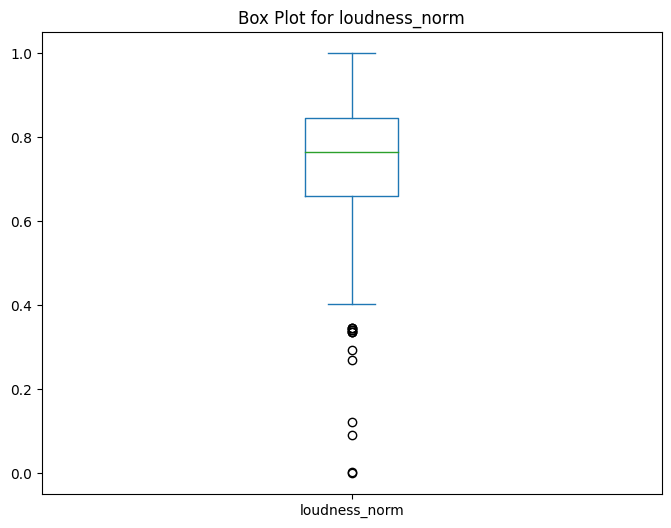

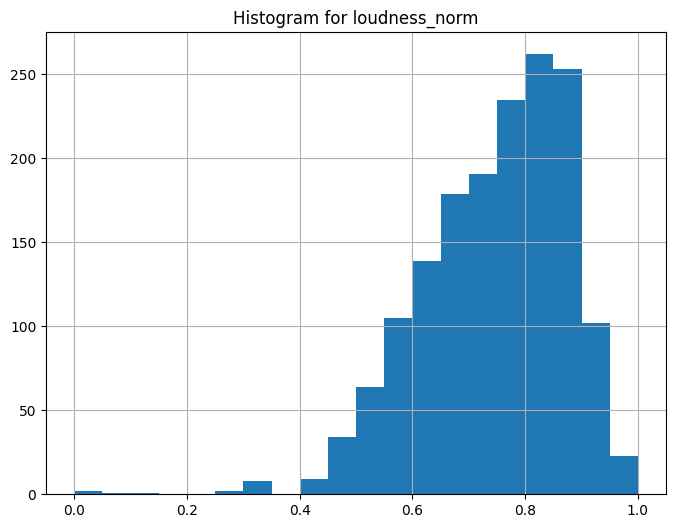


Analyzing column: popularity_norm


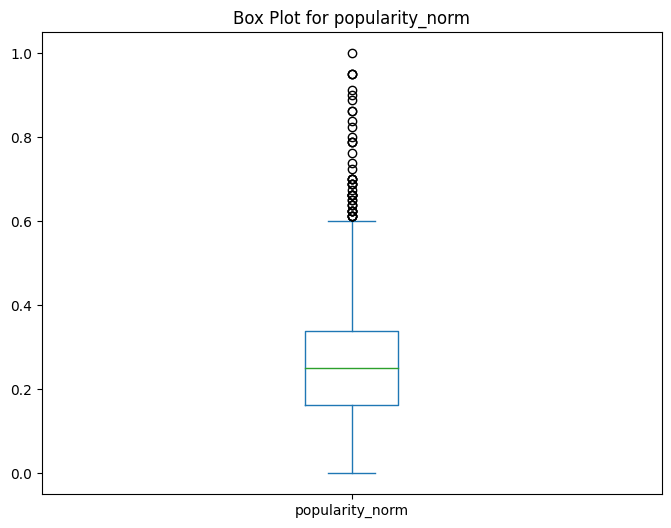

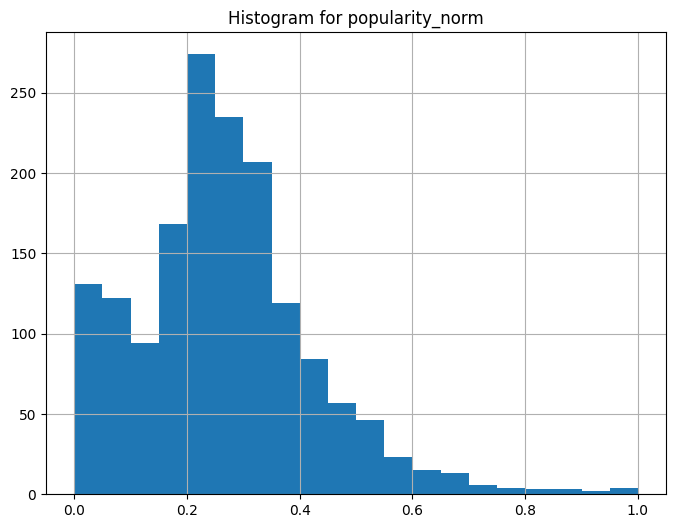


Analyzing column: tempo_norm


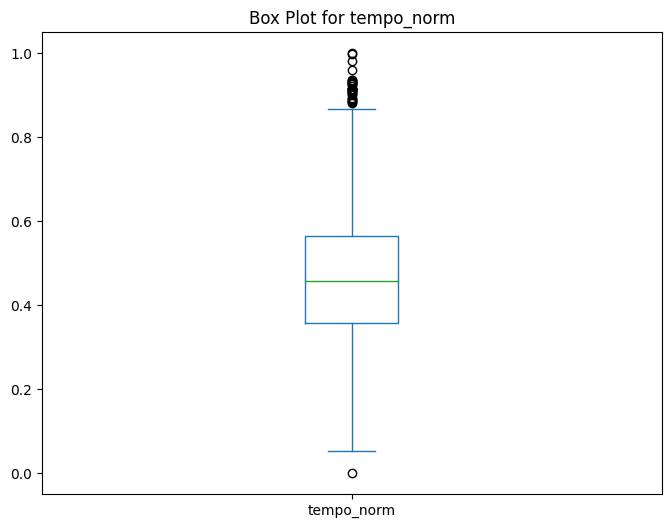

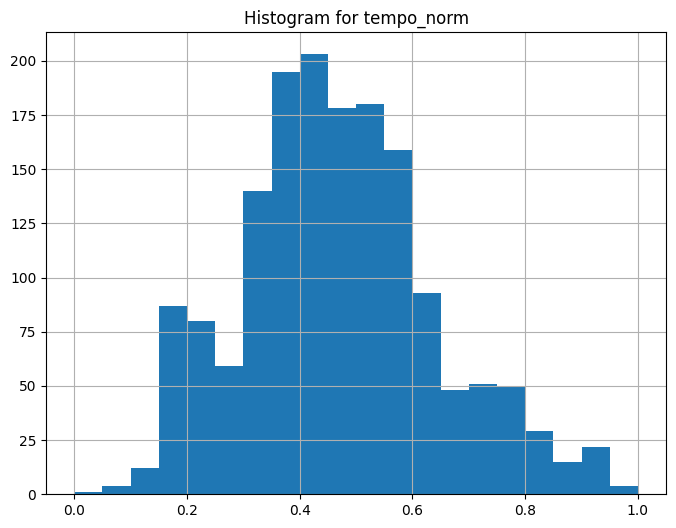


Analyzing column: duration_norm


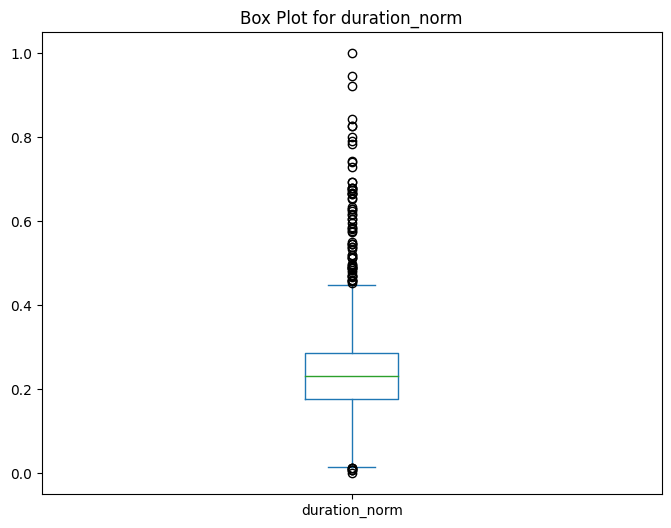

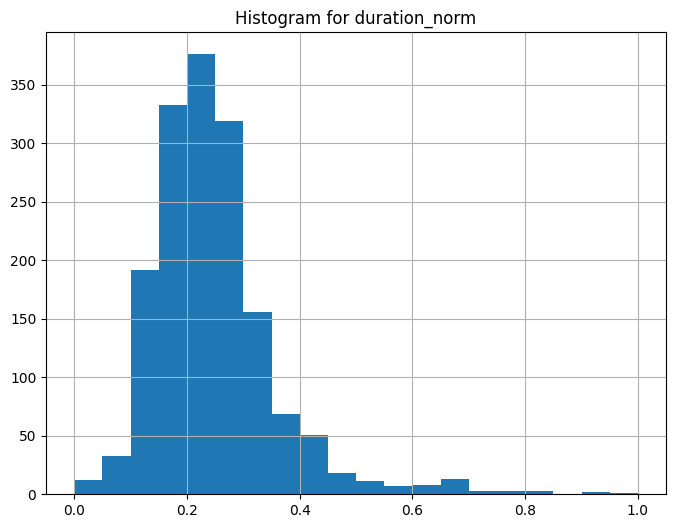

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loudness_norm    1610 non-null   float64
 1   popularity_norm  1610 non-null   float64
 2   tempo_norm       1610 non-null   float64
 3   duration_norm    1610 non-null   float64
dtypes: float64(4)
memory usage: 50.4 KB


,loudness_norm,popularity_norm,tempo_norm,duration_norm
count,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.745336,0.259852,0.468592,0.246378
std,0.127982,0.155336,0.172186,0.112746
min,0.000000,0.000000,0.000000,0.000000
25%,0.659378,0.162500,0.358500,0.176521
50%,0.764512,0.250000,0.458711,0.231138
75%,0.846339,0.337500,0.564444,0.285492
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# This runs descriptive analysis on the df_noorm data frame
import scipy.stats as stats
df.columns

# Identify numerical columns for analysis
#Exclude your binaries . they got reset to zero with automated Winsorization

#exclude_list = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#       'AcceptedCmp2', 'Response', 'Complain']
exclude_list=[]
numerical_columns = df_norm.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)

#numerical_columns = df.select_dtypes(include=['int64', 'float64']) ---- this didnt work
# Careful with outlier check on binary columns. It will set them to zero
# Create a function for outlier detection and treatment
def detect_and_treat_outliers(column):
    """
    Detects outliers in a numerical column using IQR and removes or winsorizes them.

    Args:
        column: The numerical column to analyze.

    Returns:
        The cleaned column with outliers removed or winsorized.
    """

    # Calculate IQR and quantiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers (values beyond 1.5 IQR from quartiles)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]


    # 1. Winsorize outliers (replace with nearest non-outlier value)
    # Choosing winsorize with clip method as I want the shape of my data frame unchanged with no nulls.
    # Another method we can use the matstats library the command is slick!
    #from scipy.stats import mstats
    #cleaned_column = mstats.winsorize(df[column_to_winsorize], limits=(lower_limit, upper_limit))

    cleaned_column = column.clip(lower_bound, upper_bound,axis=0)

    return cleaned_column
clean_df=pd.DataFrame()
# Iterate through numerical columns and visualize distributions
#Basic plot for every column descriptive anaysis.
#Eyeballing the data is much better I feel and faster. Gimmmick
for column in numerical_columns:
    print(f"\nAnalyzing column: {column}")

    # Create box plot
    plt.figure(figsize=(8, 6))
    df_norm[column].plot(kind='box')
    plt.title(f"Box Plot for {column}")
    plt.show()

    # Create histogram
    plt.figure(figsize=(8, 6))
    df_norm[column].hist(bins=20)
    plt.title(f"Histogram for {column}")
    plt.show()

    # Detect and treat outliers (use the chosen method from the function)

    clean_df[column] = detect_and_treat_outliers(df_norm[column])
    #df[column] = detect_and_treat_outliers(df[column])
clean_df.info()
clean_df.describe()
df_norm.describe()

# Save the cleaned DataFrame if needed
# cleaned_df.to_csv('cleaned_data.csv', index=False)


now merge my normalised data into new df. Copy this back to csv file in google drive so that . You dont run the whole process of cleaning again.

In [ ]:
dfnew=pd.concat([df,df_norm],axis=1)
dfnew.info()
dfnew.to_csv('/content/drive/My Drive/Dataset/spotify_rev1.csv',index=False)

# Start of task
The cleaned data is now in new csv. Run from this clode block onwards for the analysis as colabs keeps getting disconnected after a while

In [ ]:
#Run the imports from the top of the notebook.
# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/spotify_rev1.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)
df['release_date']=pd.to_datetime(df['release_date'])
print (df['release_date'].dtype)
#Converted to date time field now can be used in timeline charts
# Load the new cleaned and normalised dataset in spotify_rev1 file
#Extract year from the release_date fiels and add to the df
# Convert date to integer (YYYYMMDD format)
df['date_int'] = df['release_date'].dt.strftime('%Y%m%d').astype(int)

# Normalize the integer column between 0 and 1
df['date_norm'] = (df['date_int'] - df['date_int'].min()) / (df['date_int'].max() - df['date_int'].min())
del df['date_int']
#I want to normalise year of release to use in corelation to prevent bias of factor.
#Note my new file is loading into dataframe df as toomany names cause confusion
df.info()
df.describe()
df.columns

Index(['Column1', 'name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'loudness_norm', 'popularity_norm', 'tempo_norm',
       'duration_norm', 'date_norm', 'popular'],
      dtype='object')

Make a corelation matrix

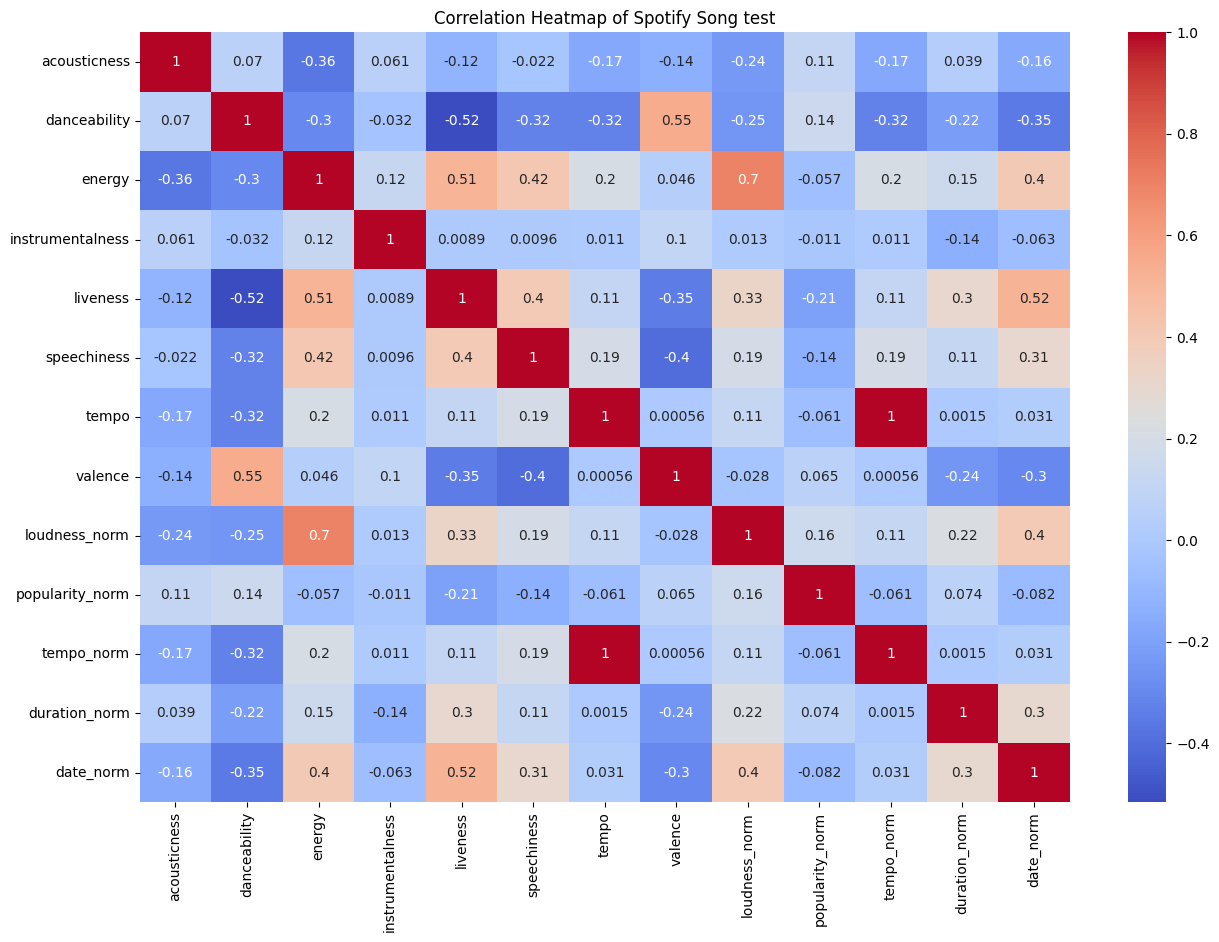

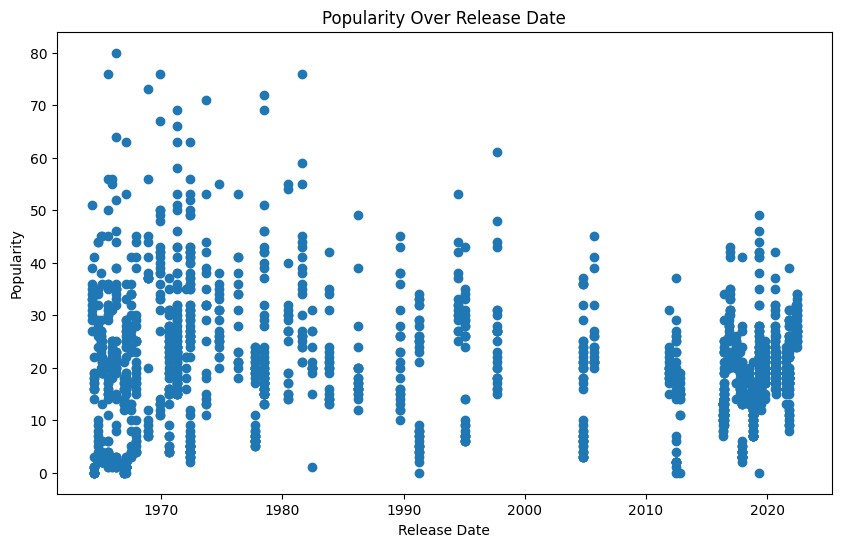

In [ ]:
#Segregate the columns you want to run a corelation on.
#Remove columns that have already been normalised to new fields
import matplotlib.pyplot as plt

exclude_list=['Column1','loudness','popularity','tempo','duration_ms']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)



# Reduce the numerical columns in the plot to managable. Cloose from numerical columns
list_col=['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness',  'speechiness', 'tempo', 'valence',
        'loudness_norm', 'popularity_norm', 'tempo_norm',
       'duration_norm', 'date_norm']
# Calculate correlation matrix
correlation = df[list_col].corr()
print(correlation)

# Create the heatmap using Seaborn for better control and colorbar
plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Spotify Song test")
plt.show()


# Analyze numerical features, identify patterns. Understand distribution of "popularity"
plt.figure(figsize=(10, 6))  #  Width=10 inches, Height=6 inches
# Visualize trends over time (if applicable)
plt.scatter(df['release_date'], df['popularity'])
# Add labels and title
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Popularity Over Release Date')
plt.show()


# Task 1
 find out which two albums should be recommended to anyone based on the number of popular songs in an album. Present data visually

In [ ]:

# Definition of popular
# Calculate the number of popular songs per album
# My 75 pervcentile score of popularity is 27 hence st the threshold to 30

popular_threshold = 30 # Consider songs with popularity above 30 score as popular
df['popular'] = df['popularity'] > popular_threshold
popular_songs_per_album = df.groupby('album')['popular'].sum()

# Sort albums by the number of popular songs
popular_songs_per_album.sort_values(ascending=False, inplace=True)


Plot this vsulisatio of polularity vs song

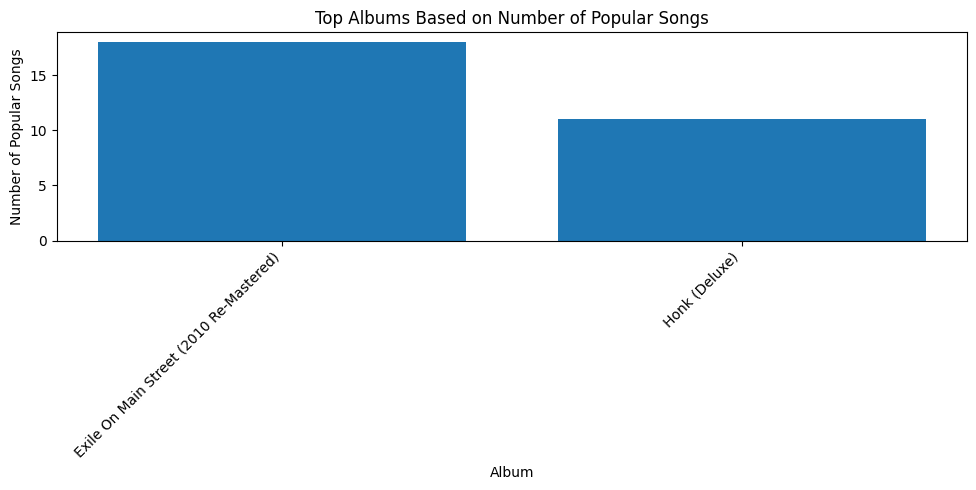

In [ ]:
# Select the top albums
top_albums = popular_songs_per_album.index[:2]

# Visualize the count of popular songs in the top albums
plt.figure(figsize=(10, 5))
plt.bar(top_albums, popular_songs_per_album.loc[top_albums])
plt.xlabel("Album")
plt.ylabel("Number of Popular Songs")
plt.title("Top Albums Based on Number of Popular Songs")
# Rotate x labels for better visibility. Trying diff formats
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Iden the characteristics of the top albums
filtered_df = df[df['popular'] ]
filtered_df.sort_values(by='popularity', ascending=False,inplace=True)


# Print the resulting DataFrame
print(filtered_df[:5])

     Column1                                               name  \
826     1403                                    Paint It, Black   
193      862                      Start Me Up - Remastered 2009   
339     1472       (I Can't Get No) Satisfaction - Mono Version   
453     1248                                      Gimme Shelter   
54      1257  Sympathy For The Devil - 50th Anniversary Edition   

                                          album release_date  track_number  \
826                                   Aftermath   1966-04-15             1   
193               Tattoo You (2009 Re-Mastered)   1981-08-24             1   
339                            Out Of Our Heads   1965-07-30             7   
453                                Let It Bleed   1969-12-05             1   
54   Beggars Banquet (50th Anniversary Edition)   1968-12-06             1   

                         id                                   uri  \
826  63T7DJ1AFDD6Bn8VzG6JE8  spotify:track:63T7DJ1AFDD6Bn8V

<ipython-input-104-0fe4e20f12a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='popularity', ascending=False,inplace=True)


#Popularity dependancies over time
Discover how a song's popularity relates to various factors and how this has changed over time.
Line Plot: Visualize the average (or median) popularity per year over time to observe overall trends.


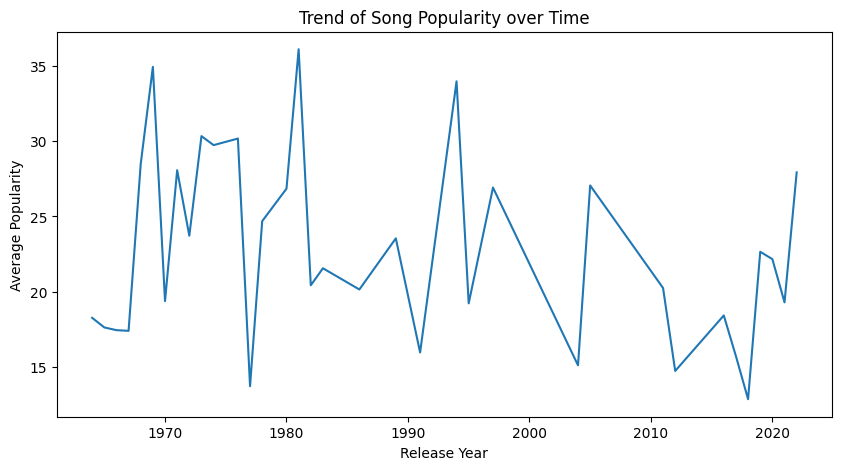

In [ ]:
#Extract the year out of the rel date field
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
#Plot a line chart for mean polularity grouped over the rel year
df_yearly_popularity = df.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_popularity.index, df_yearly_popularity.values)
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Trend of Song Popularity over Time')
plt.show()


Mod the code to draw a trendline by using np.polyfit() function

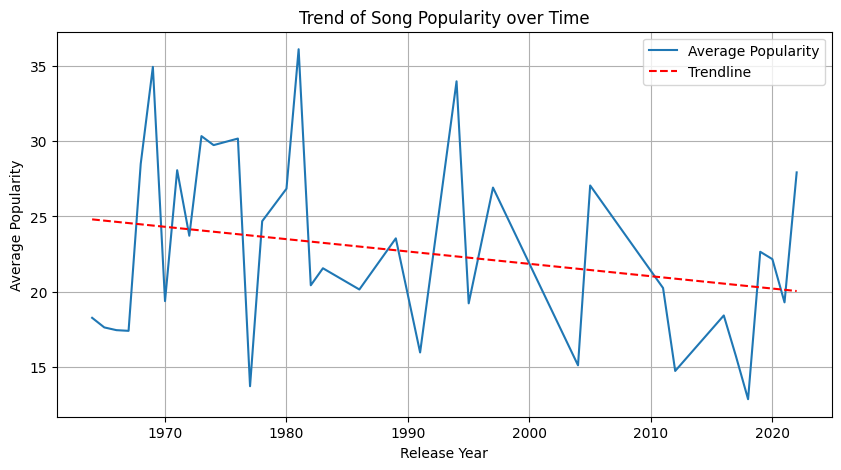

In [ ]:

# Same code on top but added a trendline to the plot
# Create a linear trendline using numpy.polyfit
z = np.polyfit(df_yearly_popularity.index, df_yearly_popularity.values, 1)
p = np.poly1d(z)

# Plot the data points and the trendline
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_popularity.index, df_yearly_popularity.values, label='Average Popularity')
plt.plot(df_yearly_popularity.index, p(df_yearly_popularity.index), color='red', linestyle='--', label='Trendline')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Trend of Song Popularity over Time')
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()


##Popularity vs. Features Over Time

Scatter Plots and Groupings: Create scatter plots like:

popularity vs. danceability
popularity vs. energy
Use color-coding or separate subplots to distinguish year ranges (e.g., songs from the 80s, 90s, 2000s, etc.). This will show if feature correlation with popularity has changed over different time periods.

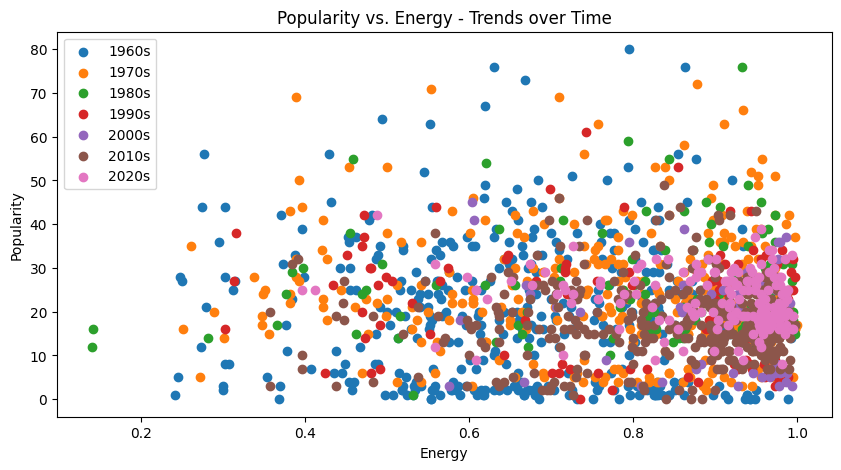

In [ ]:
#Tring different feature sets to iden relation
# This is the toughest part as the data is haywire-- revisit
#  Popularity vs. Energy with release year distinctions
plt.figure(figsize=(10, 5))
for decade, group in df.groupby(df['release_year'] // 10 * 10):
      plt.scatter(group['energy'], group['popularity'], label=f"{decade}s")
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Popularity vs. Energy - Trends over Time')
plt.legend()
plt.show()


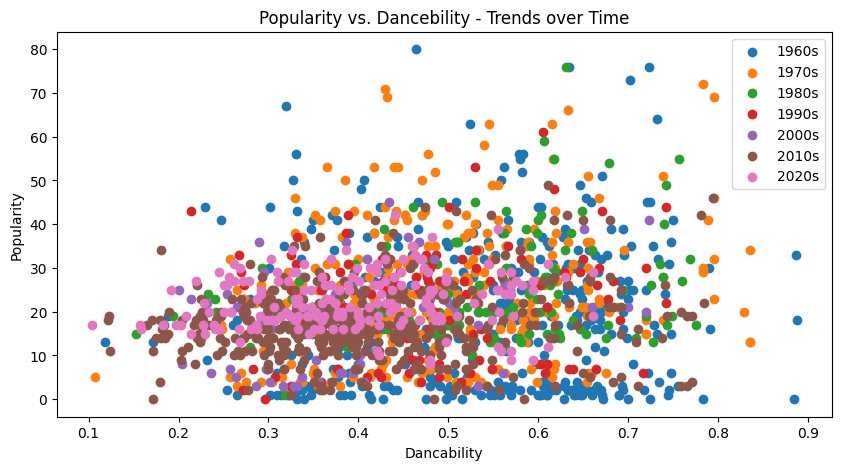

In [ ]:
# Popularity vs. Dancability with release year distinctions
plt.figure(figsize=(10, 5))
for decade, group in df.groupby(df['release_year'] // 10 * 10):
      plt.scatter(group['danceability'], group['popularity'], label=f"{decade}s")
plt.xlabel('Dancability')
plt.ylabel('Popularity')
plt.title('Popularity vs. Dancebility - Trends over Time')
plt.legend()
plt.show()


['Column1', 'name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'loudness_norm', 'popularity_norm', 'tempo_norm',
       'duration_norm', 'date_norm', 'popular'],

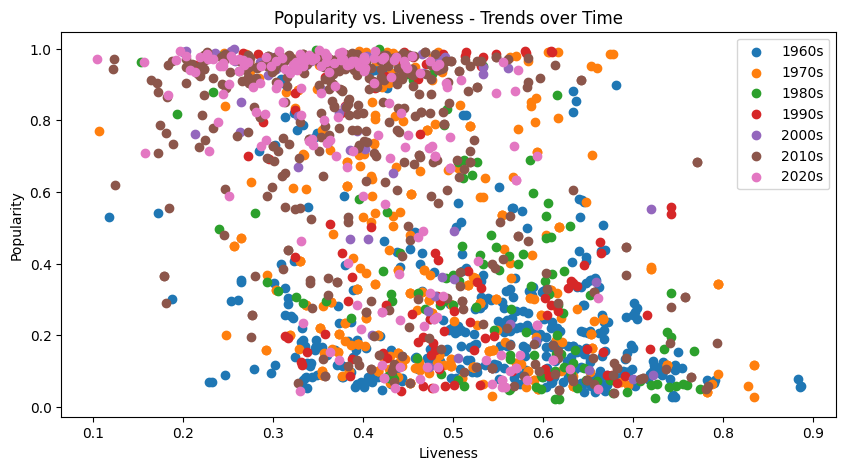

In [ ]:
# Popularity vs. liveness with release year distinctions
plt.figure(figsize=(10, 5))
for decade, group in df.groupby(df['release_year'] // 10 * 10):
      plt.scatter(group['danceability'], group['liveness'], label=f"{decade}s")
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.title('Popularity vs. Liveness - Trends over Time')
plt.legend()
plt.show()

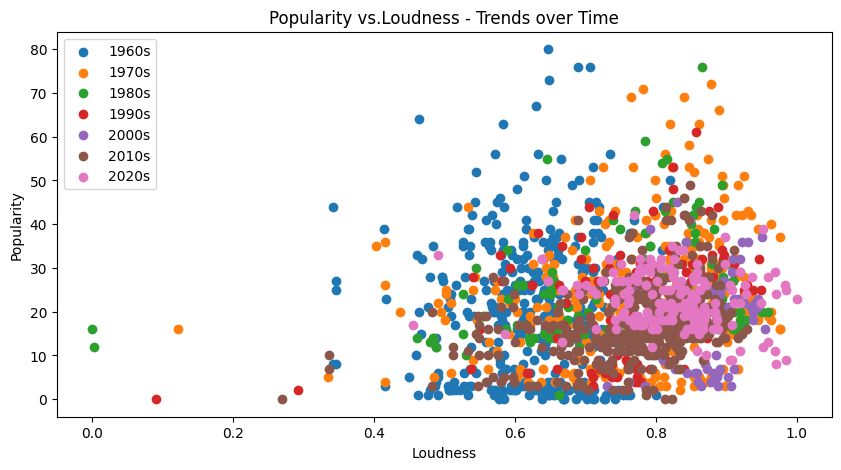

In [ ]:
# Popularity vs. Loudness with release year distinctions
plt.figure(figsize=(10, 5))
for decade, group in df.groupby(df['release_year'] // 10 * 10):
      plt.scatter(group['loudness_norm'], group['popularity'], label=f"{decade}s")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Popularity vs.Loudness - Trends over Time')
plt.legend()
plt.show()

In [ ]:
# Popularity vs. Speecheness with release year distinctions
plt.figure(figsize=(10, 5))
for decade, group in df.groupby(df['release_year'] // 10 * 10):
      plt.scatter(group['speechiness'], group['popularity'], label=f"{decade}s")
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Popularity vs. Speechiness - Trends over Time')
plt.legend()
plt.show()
df.columns

Index(['Column1', 'name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'loudness_norm', 'popularity_norm', 'tempo_norm',
       'duration_norm', 'date_norm', 'popular', 'release_year', 'cluster'],
      dtype='object')

#Linear regression on the data
indep variable as popularity and indep vaiabiles as, dancebility, liveliness,loudness_norm an speechiness. This data is continuous so applied liner regression. I havent chosen any categorical variables as applying onehot method would have multimlied the dimensionality as number of ablusm is too high.
Keep running this algo on different feature set to get a high R square value. This is the best i could get with very low corelation in data.

In [ ]:
X = df[['liveness','danceability','loudness_norm', 'speechiness','acousticness']]
y = df['popularity_norm']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets for evaluation 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Model creation and fitting
model = LinearRegression()
model.fit(X_train, y_train)  # Replace X_train, y_train if you didn't split data
#Examine coeff
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



Intercept: -0.010078236326016843
Coefficients: [-0.09693499  0.07493575  0.36851932 -0.24004502  0.10126966]


In [ ]:
# Predictions
predictions = model.predict(X_test)  # Using test data to make predictions

#Evaluation
from sklearn.metrics import r2_score, mean_squared_error

print("R-squared:", r2_score(y_test, predictions))  # Results for my test data split
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


R-squared: 0.13463616860962335
Mean Squared Error: 0.01979423053111896


#principal component analysis
 to reduce dimensionality. Again this algo is run multile time to get best fit.

In [ ]:
# I have choses the featureset finailised with liner regression
X = df[['speechiness', 'danceability', 'loudness_norm', 'liveness']]
df.columns
# If necessary, convert these features to numeric type if not already:
X = X.astype(float)
from sklearn.preprocessing import StandardScaler

# Assuming your relevant features are in a matrix 'X'
# 'Standardization' before PCA is often good practice

scaled_features = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_reduced = pca.fit_transform(scaled_features)

# Explained variance
print("Variance ration:  ", pca.explained_variance_ratio_)
#Loadings
loadings = pca.components_.T
# Transpose to get them in the commonly expected shape: features as rows, components as columns

print(f'Loading of the model /n {loadings}')

Loading of the model /n [[ 0.46747945  0.46188434]
 [-0.53501817 -0.16676239]
 [ 0.40056891 -0.86801114]
 [ 0.57858712  0.07355147]]


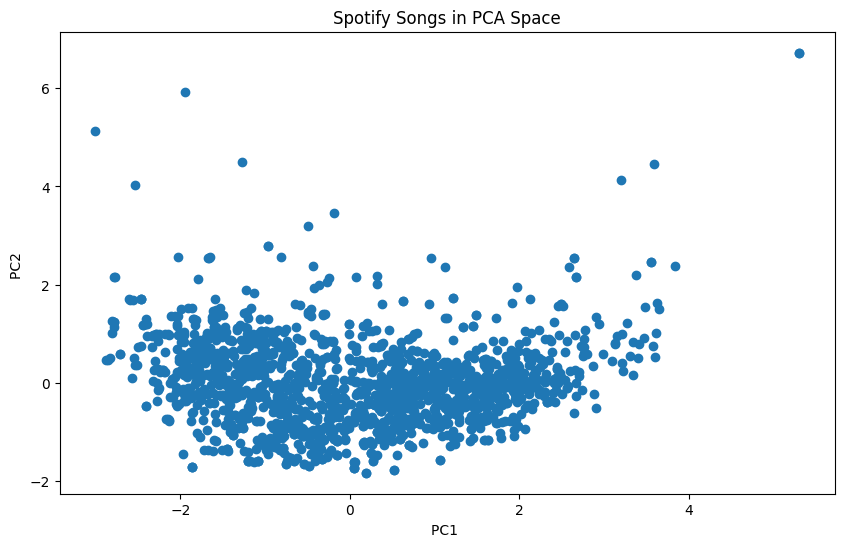

In [ ]:
# Access the coordinates of each song in the reduced space
x_coordinate = X_reduced[:, 0]  # This represents PC1
y_coordinate = X_reduced[:, 1]  # This represents PC2

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coordinate, y_coordinate)
plt.xlabel('PC1 ')
plt.ylabel('PC2 ')
plt.title('Spotify Songs in PCA Space')
plt.show()

#Creating clusters
Used the Kmeans algo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

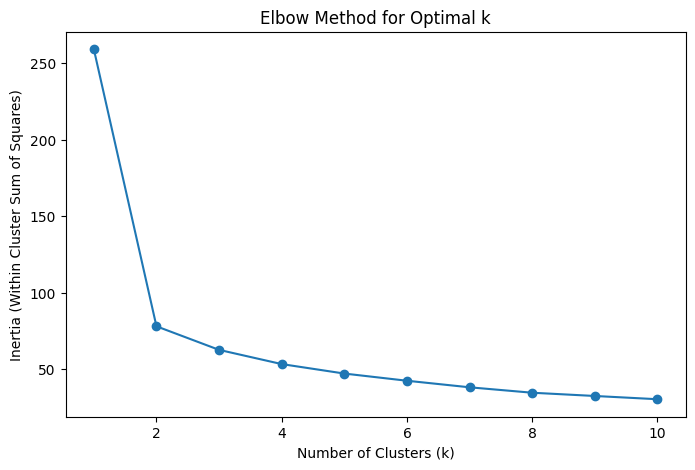

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method with KMeans
inertia = []
for k in range(1, 11):  # Trying values from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  # 'random_state' for reproducibility
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Feature Statistics:
           Column1  track_number  acousticness  danceability      energy  \
count   920.000000    920.000000    920.000000    920.000000  920.000000   
mean   1001.821739      7.572826      0.274256      0.531522    0.718065   
std     424.398417      5.662345      0.244552      0.130457    0.184596   
min      46.000000      1.000000      0.000009      0.179000    0.141000   
25%     729.750000      4.000000      0.062225      0.432750    0.580000   
50%    1065.000000      7.000000      0.198000      0.540000    0.731000   
75%    1352.250000     10.000000      0.454250      0.631000    0.877250   
max    1609.000000     40.000000      0.994000      0.887000    0.997000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        920.000000  920.000000  920.000000   920.000000  920.000000   
mean           0.161290    0.210825   -7.783008     0.051912  123.304953   
std            0.274960    0.130802    3.193915     0.031

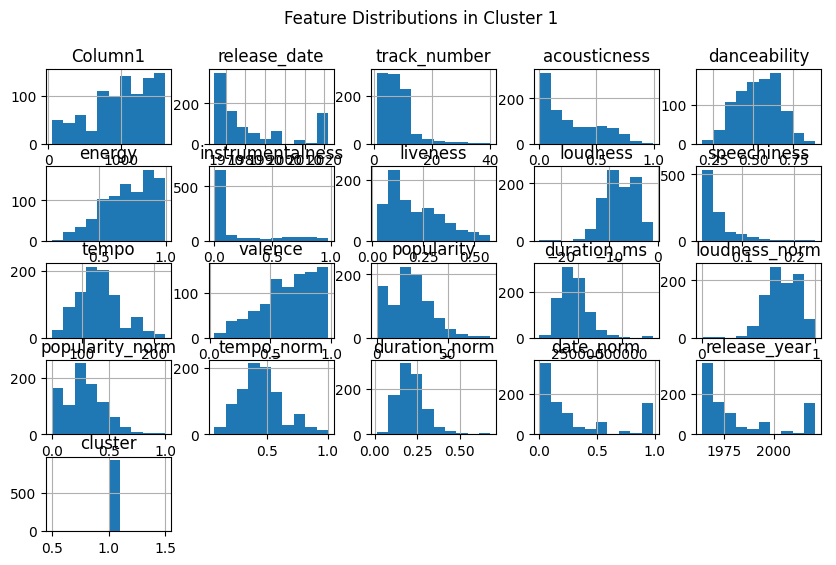

Cluster 0 Feature Statistics:
           Column1  track_number  acousticness  danceability      energy  \
count   690.000000    690.000000    690.000000    690.000000  690.000000   
mean    541.404348     10.001449      0.218766      0.385310    0.891401   
std     378.420386      7.373018      0.198049      0.109569    0.113676   
min       0.000000      1.000000      0.000024      0.104000    0.272000   
25%     223.250000      5.000000      0.053450      0.309250    0.857750   
50%     498.500000      9.000000      0.166500      0.382000    0.936000   
75%     759.750000     14.000000      0.339000      0.455000    0.970000   
max    1582.000000     47.000000      0.920000      0.771000    0.999000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        690.000000  690.000000  690.000000   690.000000  690.000000   
mean           0.168010    0.866270   -5.889758     0.092980  129.784806   
std            0.278111    0.126227    2.296928     0.063

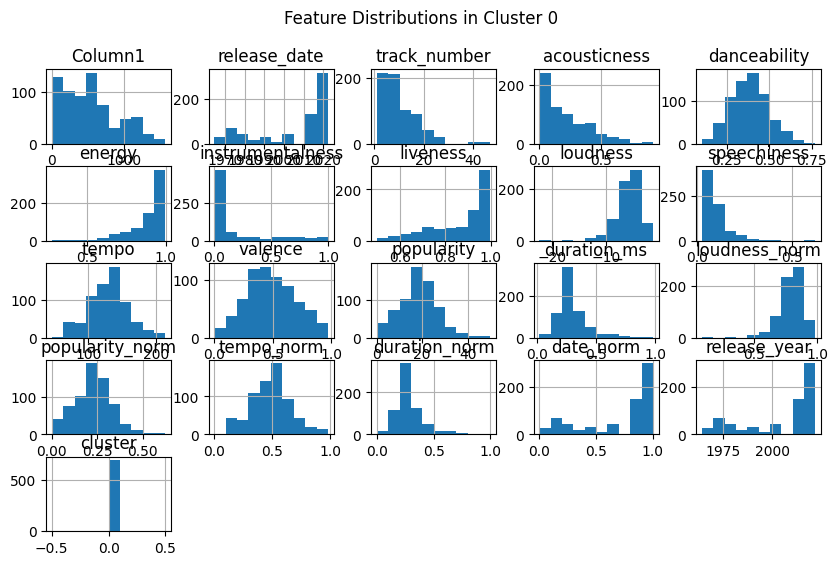

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


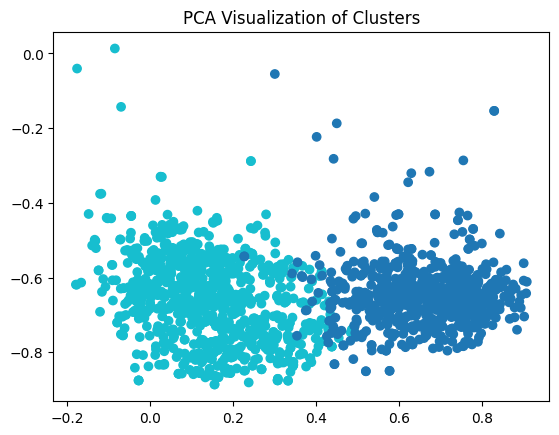

In [ ]:
#Based on the elbow menhod choosing two clusters and generating cluster fiels
# Perform K-Means with k=2 (based on your Elbow Method analysis)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Analyze feature distributions per cluster
for cluster_num in df['cluster'].unique():  # Iterates over unique cluster IDs
    cluster_data = df[df['cluster'] == cluster_num]

    # Descriptive Statistics
    print(f"Cluster {cluster_num} Feature Statistics:")
    print(cluster_data.describe())

    # Visualize distributions within a cluster
    cluster_data.hist(figsize=(10, 6))
    plt.suptitle(f"Feature Distributions in Cluster {cluster_num}")
    plt.show()

# ... After fitting PCA
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='tab10')  # cmap for colors
plt.title('PCA Visualization of Clusters')
plt.show()
